### DSC550
##### week8 project milestone 3, Author Xin Tang 5/17/24

Requirement:
1. select and evaluate the model
2. train and test a model
3. join milestone 1 and 2 and 3 together

In [2]:
# Load packages first
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

In [3]:
#load the df resulted from last milestone
MS3 = pd.read_csv('income_MS2.csv')
MS3.head(4)

,age,workclass,education_len,marital_status,occupation,relationship,race,sex,native.country,income
0,17,Private,7,Never-married,Handlers-cleaners,Own-child,White,0,United-States,0
1,17,Private,5,Never-married,Other-service,Own-child,White,0,United-States,0
2,17,Private,7,Never-married,Adm-clerical,Own-child,White,1,United-States,0
3,17,Private,6,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,1,United-States,0


###### Model selection
from last few weeks exercises, I used linear regression model, Polynominal model and Randomforest model for numerical variable prediction. At later weeks, I used support vector Machine model and  logical regression for categorical variable predication.

Personally I like random forest since it is a linear regression model but have advantage of overfitting avoid. 

######  Convert dataframe to all numerical columns

Currently the dataframe have mix of numerical and categorical columns, which is hard to use neither models I am familar with. 
Last time I have converted income from binary categories into numerical, I can continue convert rest so I can use prediction model for numerical variables. 

In [4]:
newdf = MS3.copy()
categorical_cols = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'native.country']
newdf = pd.get_dummies(MS3, columns=categorical_cols, drop_first=True)
newdf

,age,education_len,sex,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,17,7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,17,7,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,17,6,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,17,7,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28695,90,14,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28696,90,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28697,90,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28698,90,9,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# now I have a lot of more columns. all slection choices from each category variables turns into a columns.
# total 77 columns
newdf.shape

(28700, 77)

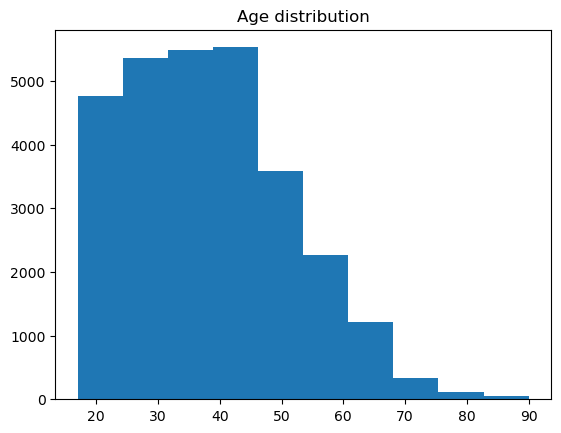

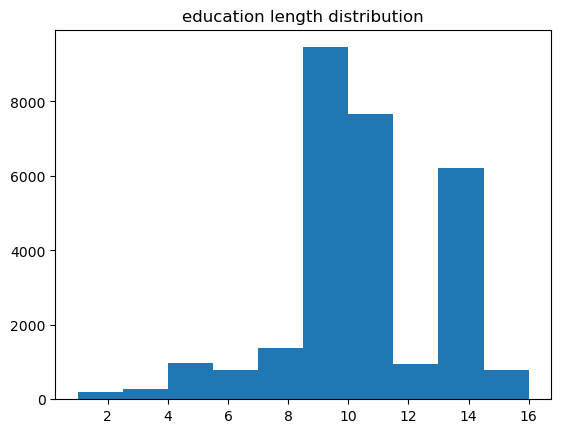

In [17]:
# now I check distribution of age and education_len to see if they are normal distributed, 
#so I can decide if I need to standarlize them

plt.hist(newdf.age)
plt.title('Age distribution')
plt.show()

plt.hist(newdf.education_len)
plt.title('education length distribution')
plt.show()

In [ ]:
# I think the distribution is compact enough so I do not need to standardlize them

In [5]:
# now define the independent features and dependent feature (which is income level)
X = newdf.drop(columns=['income'])
y = newdf.income

#now split it into train and test dataset, 20% are testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Model 1. RandomForest Regressor (simple one and one with hyper parameter optimizer)

In [57]:
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(random_state=42)

rf = RandomForestRegressor(n_estimators=300, max_depth=5, random_state=0)
rf.fit(X_train , y_train)
pred = rf.predict(X_test)
pred[4030:4040]

array([0.80619507, 0.04137852, 0.04101039, 0.25425958, 0.44838864,
       0.25375449, 0.80550804, 0.01865008, 0.78491931, 0.68162096])

In [66]:
# Since the linear regression will return number, so need to convert it to only 0 and 1. use 0.5 as creteria to classify 
# >=0.5 will be classified as 1 and <0.5 will be classified as 0
predict =[]
for item in pred:
    if item >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
        

In [79]:
print('accuracy of simple random forest prediction is:',round(accuracy_score(y_test, predict),4))

accuracy of simple random forest prediction is: 0.8254


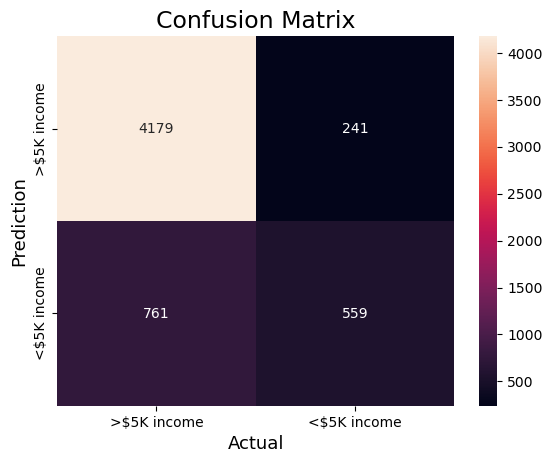

In [80]:
# Create a confusion matrix for the test set predictions.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

#visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['>$5K income','<$5K income'],
            yticklabels=['>$5K income','<$5K income'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [72]:
# Get the precision, recall, and F1-score for the test set predictions.
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4420
           1       0.70      0.42      0.53      1320

    accuracy                           0.83      5740
   macro avg       0.77      0.68      0.71      5740
weighted avg       0.81      0.83      0.81      5740



In [53]:
# now use a more accurately defined randomforest model
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

In [54]:
# use hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [51]:
# find out best estimator
best_RF_model = grid_search_rf.best_estimator_
y_pred_rf=best_RF_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [77]:
print("random forest regression with hyperparameter tuning Accuracy:", round(accuracy,4))

random forest regression with hyperparameter tuning Accuracy: 0.8348


###### This method is very computer resource consuming but just improved the accuracy less than 0.01, seems not worthy it. 

###### Try RandomForestClassifier model

In [6]:
# data prediction using classifier

from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(random_state=42)
cf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
cf_y_pred = cf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

print(f'Accuracy of classifier is:', round(accuracy_score(y_test, cf_y_pred), 4))

Accuracy of classifier is: 0.8061


In [8]:
# Calculate feature importance
feature_importances = cf.feature_importances_

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 [Text(0, 0, 'age'),
  Text(0, 1, 'education_len'),
  Text(0, 2, 'sex'),
  Text(0, 3, 'workclass_Local-gov'),
  Text(0, 4, 'workclass_Private'),
  Text(0, 5, 'workclass_Self-emp-inc'),
  Text(0, 6, 'workclass_Self-emp-not-inc'),
  Text(0, 7, 'workclass_State-gov'),
  Text(0, 8, 'workclass_Without-pay'),
  Text(0, 9, 'marital_status_Married-AF-spouse'),
  Text(0, 10, 'marital_status_Married-civ-spouse'),
  Text(0, 11, 'marital_status_Married-spouse-absent'),
  Text(0, 12, 'marital_status_Never-married'),
  Text(0, 13, 'marital_status_Separated'),
  Text(0, 14, 'marital_status_Widowed'),
  Text(0, 15, 'occupation_Armed-Forces'),
  Text(0, 16, 'occu

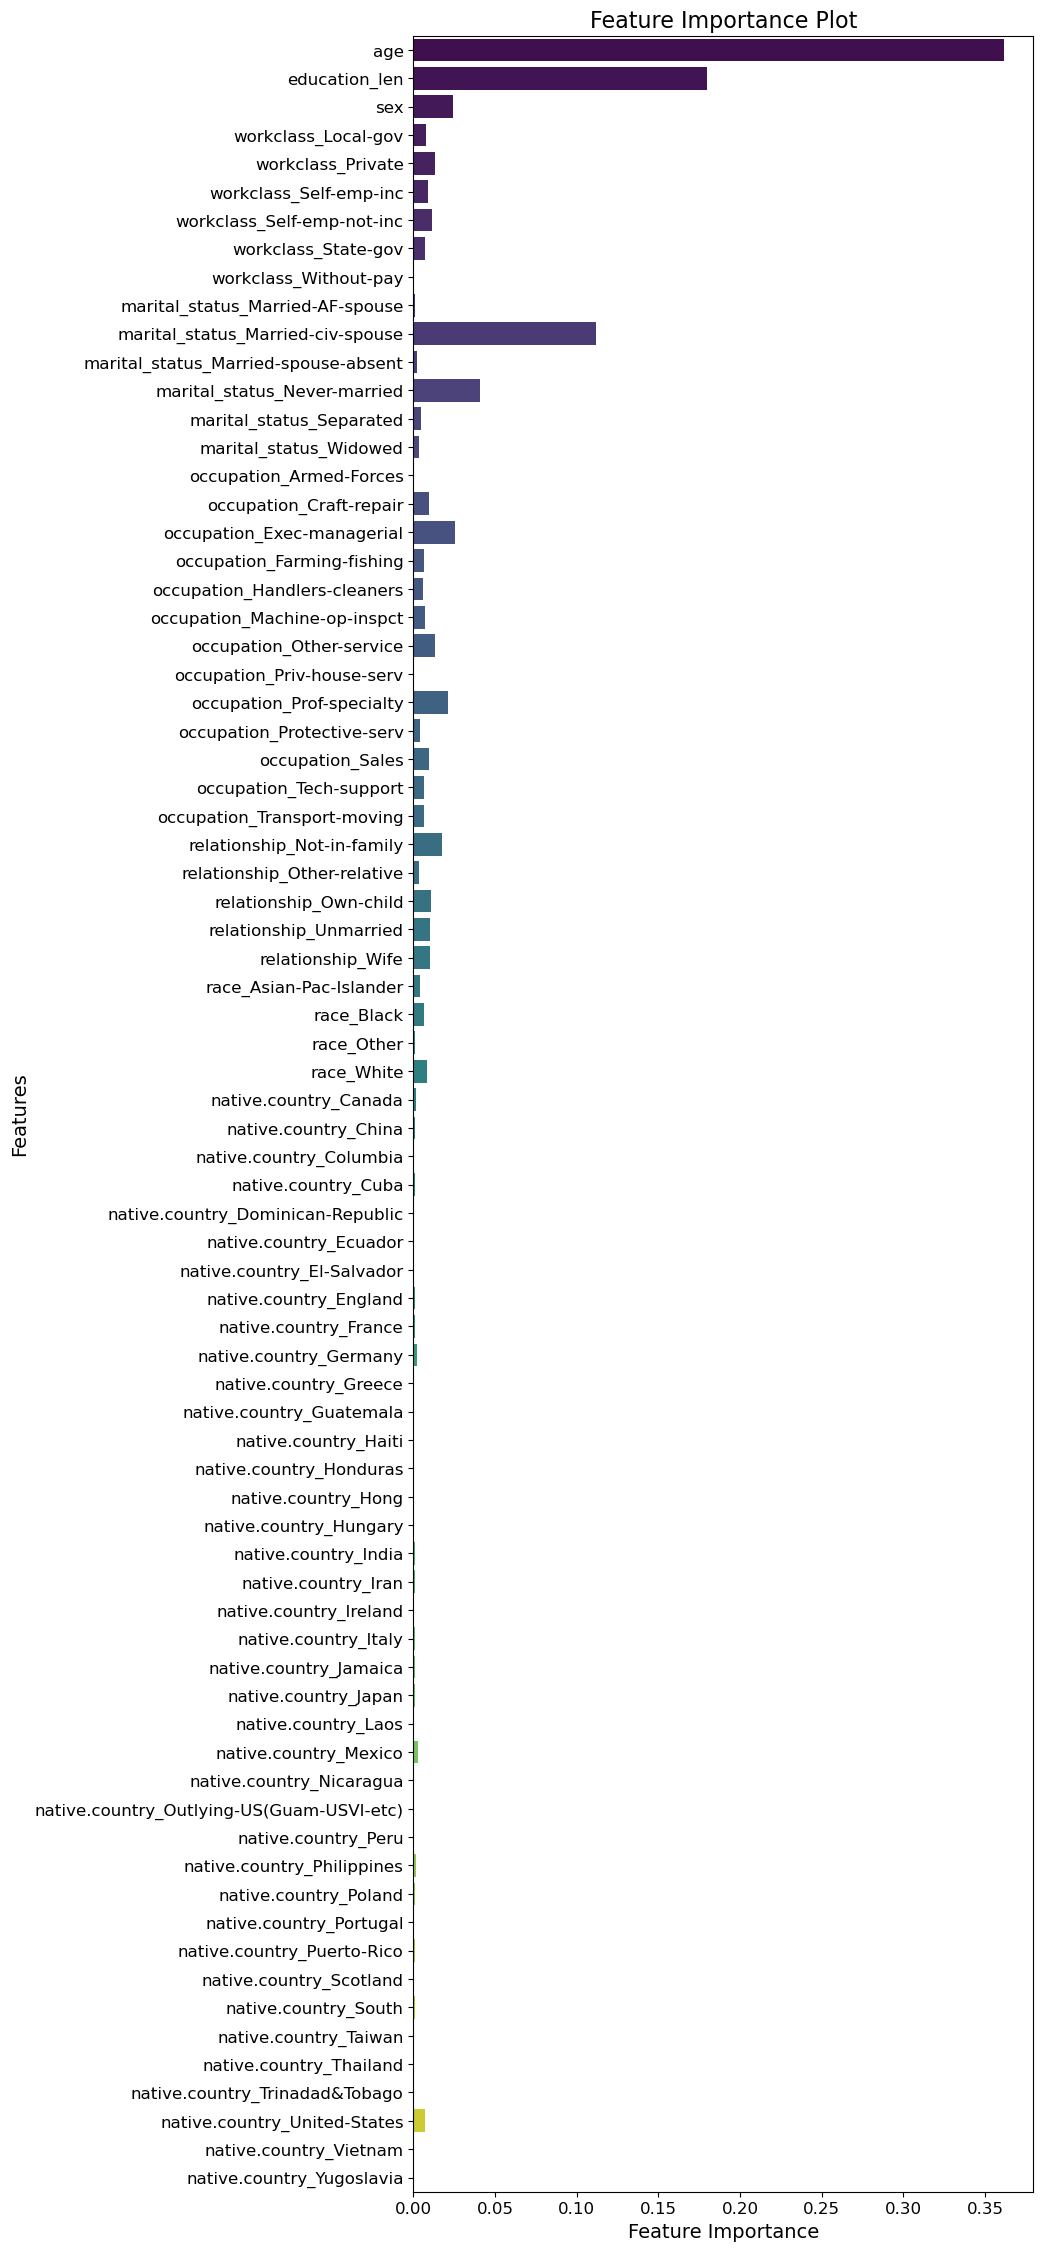

In [17]:
# This can be deleted
plt.figure(figsize=(8, 28))
sns.barplot(x=feature_importances, y=X_train.columns, palette="viridis")

# Construct the plot
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance Plot', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

###### looks like age and education length are 2 most important factors. married  with spouse status is also important. Native country is really not matter 

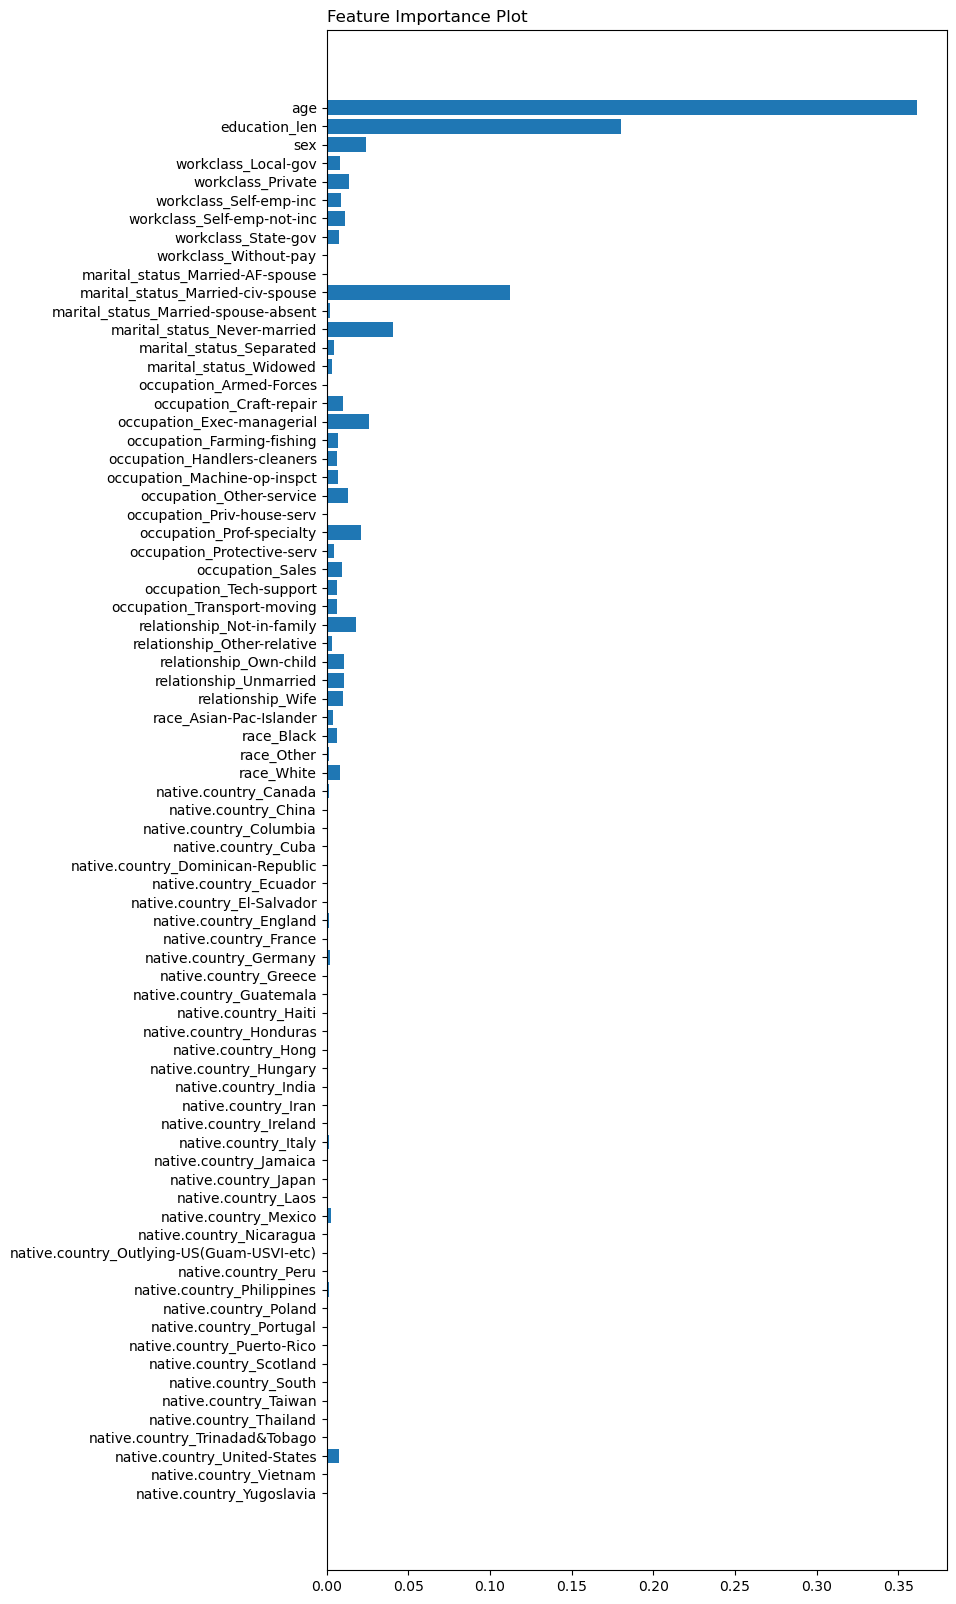

In [13]:
# try plot again
#plt.figure(figsize=(8, 28))

fig, ax = plt.subplots(figsize =(8, 20))

ax.barh(X_train.columns, feature_importances )

ax.invert_yaxis()

ax.set_title('Feature Importance Plot',loc ='left', )

plt.show()